In [1]:
%load_ext autoreload
%autoreload 2

# EDA

ETTh1, ETTh2, ETTm1, ETTm2データセットのEDAを行う。
- データの基本統計量の確認
- 欠損値の確認
- 時系列データの可視化

## Data Loading

In [2]:
from utils.logging import setup_logging

_log = setup_logging("INFO")

from athena_analyze.data.processor import DataProcessor
from athena_analyze.eda.reporter import write_timeseries_report
from pathlib import Path
from utils.plotter import Plotter

plotter = Plotter(output_fol="../reports/figures")

data_processor = DataProcessor(data_fol="../data/raw")
df_etth1 = data_processor.load_data("ETTh1.csv")
df_etth1 = data_processor.preprocess_data(df_etth1, add_features=["date_features", "season"])
write_timeseries_report(df_etth1, output_path="../reports/eda/etth1_raw.md")
_log.debug(f"ETTh1 data shape after preprocessing: {df_etth1.shape}")
df_etth2 = data_processor.load_data("ETTh2.csv")
df_etth2 = data_processor.preprocess_data(df_etth2, add_features=["date_features", "season"])
write_timeseries_report(df_etth2, output_path="../reports/eda/etth2_raw.md")
_log.debug(f"ETTh2 data shape after preprocessing: {df_etth2.shape}")
df_ettm1 = data_processor.load_data("ETTm1.csv")
df_ettm1 = data_processor.preprocess_data(df_ettm1, add_features=["date_features", "season"])
write_timeseries_report(df_ettm1, output_path="../reports/eda/ettm1_raw.md")
_log.debug(f"ETTm1 data shape after preprocessing: {df_ettm1.shape}")
df_ettm2 = data_processor.load_data("ETTm2.csv")
df_ettm2 = data_processor.preprocess_data(df_ettm2, add_features=["date_features", "season"])
write_timeseries_report(df_ettm2, output_path="../reports/eda/ettm2_raw.md")
_log.debug(f"ETTm2 data shape after preprocessing: {df_ettm2.shape}")

df_etth = df_etth1.join(df_etth2, lsuffix='_etth1', rsuffix='_etth2', how='outer')
_log.debug(f"Combined ETTh data shape: {df_etth.shape}")
df_ettm = df_ettm1.join(df_ettm2, lsuffix='_ettm1', rsuffix='_ettm2', how='outer')
_log.debug(f" Combined ETTm data shape: {df_ettm.shape}")

2026-02-03 17:54:33,366 - athena-assignment - INFO - Dropped 0 rows, Added 2 features
2026-02-03 17:54:33,366 - athena-assignment - INFO - Data preprocessing completed
2026-02-03 17:54:33,429 - athena-assignment - INFO - Report written to: ../reports/eda/etth1_raw.md
2026-02-03 17:54:33,485 - athena-assignment - INFO - Dropped 0 rows, Added 2 features
2026-02-03 17:54:33,485 - athena-assignment - INFO - Data preprocessing completed
2026-02-03 17:54:33,530 - athena-assignment - INFO - Report written to: ../reports/eda/etth2_raw.md
2026-02-03 17:54:33,739 - athena-assignment - INFO - Dropped 0 rows, Added 2 features
2026-02-03 17:54:33,740 - athena-assignment - INFO - Data preprocessing completed
2026-02-03 17:54:33,858 - athena-assignment - INFO - Report written to: ../reports/eda/ettm1_raw.md
2026-02-03 17:54:34,058 - athena-assignment - INFO - Dropped 0 rows, Added 2 features
2026-02-03 17:54:34,059 - athena-assignment - INFO - Data preprocessing completed
2026-02-03 17:54:34,175 - at

## Description of Data Files
- `ETTh1.csv`: ETTm1データセットの1時間ごとの生データ
- `ETTh2.csv`: ETTm2データセットの1時間ごとの生データ
- `ETTm1.csv`: ETTm1データセットの生データ
- `ETTm2.csv`: ETTm2データセットの生データ

In [3]:
data_processor.describe_data(df_etth, )

,HUFL_etth1,HULL_etth1,MUFL_etth1,MULL_etth1,LUFL_etth1,LULL_etth1,OT_etth1,year_etth1,month_etth1,day_etth1,...,MUFL_etth2,MULL_etth2,LUFL_etth2,LULL_etth2,OT_etth2,year_etth2,month_etth2,day_etth2,weekday_etth2,season_etth2
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,...,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672,2016.990126,6.529047,15.647761,...,43.830356,8.322694,-3.423605,-2.085969,26.609376,2016.990126,6.529047,15.647761,3.001837,2.501263
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946,0.705025,3.457602,8.768471,...,13.056798,4.366059,6.144403,6.012796,11.888266,0.705025,3.457602,8.768471,2.002466,1.116935
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000,2016.000000,1.000000,1.000000,...,11.205000,-6.594000,-14.350000,-31.462000,-2.646500,2016.000000,1.000000,1.000000,0.000000,1.000000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000,2016.000000,4.000000,8.000000,...,37.394001,5.683000,-9.254000,-2.505000,16.469500,2016.000000,4.000000,8.000000,1.000000,2.000000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000,2017.000000,7.000000,16.000000,...,41.388000,9.302000,-3.774000,-1.226000,26.577000,2017.000000,7.000000,16.000000,3.000000,2.000000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000,2017.000000,10.000000,23.000000,...,46.078999,11.258000,2.527000,0.000000,35.585999,2017.000000,10.000000,23.000000,5.000000,4.000000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000,2018.000000,12.000000,31.000000,...,93.230003,28.736000,17.218000,2.932000,58.876999,2018.000000,12.000000,31.000000,6.000000,4.000000


## Plotting RAW Data

In [4]:
from athena_analyze.eda.visualize import plot_time_series
import matplotlib.pyplot as plt

for df, name in zip([df_etth1, df_etth2, df_ettm1, df_ettm2], ["ETTh1", "ETTh2", "ETTm1", "ETTm2"]):
    _log.debug(f"DataFrame head:\n{df.head()}")
    fig = plot_time_series(df, date_col="date", value_cols=["OT"], figsize=(8, 4))
    plotter.save_plot(fig, f"{name}_OT_time_series.png")
    plt.close(fig)
    fig = plot_time_series(df, date_col="date", value_cols=["HUFL", "MUFL", "LUFL"], figsize=(8, 4))
    plotter.save_plot(fig, f"{name}_full_load.png")
    plt.close(fig)
    fig = plot_time_series(df, date_col="date", value_cols=["HULL", "MULL", "LULL"], figsize=(8, 4))
    plotter.save_plot(fig, f"{name}_less_load.png")
    plt.close(fig)
    fig = plot_time_series(df, date_col="date", value_cols=["OT", "HUFL", "MUFL", "LUFL"], figsize=(8, 4))
    plotter.save_plot(fig, f"{name}_combined_full_load.png")
    plt.close(fig)
    fig = plot_time_series(df, date_col="date", value_cols=["OT", "HULL", "MULL", "LULL"], figsize=(8, 4))
    plotter.save_plot(fig, f"{name}_combined_less_load.png")
    plt.close(fig)


In [5]:
df_etth1, stl_etth1 = data_processor.run_stl_decomposition(df_etth1, date_col="date", target_col="OT")

## Analyzing Periodicity

周期性があるかどうかを確認するために、`analyze_periodicity`関数を使用してデータの周期性を分析します。

In [10]:
import pandas as pd
from athena_analyze.eda.analyzer import analyze_periodicity, compute_acf, compute_pacf
from athena_analyze.eda.visualize import plot_power_spectrum, plot_acf, plot_pacf

value_cols = ["period_hours", "period_days", "period_weeks", "power"]
period_target_cols = ["OT", "HUFL", "MUFL", "LUFL", "HULL", "MULL", "LULL"]
for data, name in zip([df_etth1, df_etth2], ["ETTh1", "ETTh2"]):
    for period_target in period_target_cols:
        periods_data, power_period_data = analyze_periodicity(data, fs=1.0, max_period=2500, target_col=period_target)
        fig, axes = plot_power_spectrum(power_period_data, max_period=2500)
        plotter.save_plot(fig, f"eda/periodicity/{name}_{period_target}_power_spectrum.png")
        acf_data = compute_acf(data, target_col=period_target, max_lag=2500)
        fig, ax = plot_acf(acf_data, target_col=period_target, max_lag=2500)
        plotter.save_plot(fig, f"eda/periodicity/{name}_{period_target}_acf.png")
        pacf_data = compute_pacf(data, target_col=period_target, max_lag=2500)
        fig, ax = plot_pacf(pacf_data, target_col=period_target, max_lag=2500)
        plotter.save_plot(fig, f"eda/periodicity/{name}_{period_target}_pacf.png")

2026-02-03 18:33:17,859 - athena-assignment - INFO - Detected 5 significant periods for OT
2026-02-03 18:33:29,424 - athena-assignment - INFO - Detected 5 significant periods for HUFL
2026-02-03 18:33:40,736 - athena-assignment - INFO - Detected 5 significant periods for MUFL
2026-02-03 18:33:52,164 - athena-assignment - INFO - Detected 5 significant periods for LUFL
2026-02-03 18:34:04,002 - athena-assignment - INFO - Detected 5 significant periods for HULL
2026-02-03 18:34:16,231 - athena-assignment - INFO - Detected 5 significant periods for MULL
2026-02-03 18:34:27,813 - athena-assignment - INFO - Detected 5 significant periods for LULL
2026-02-03 18:34:38,769 - athena-assignment - INFO - Detected 5 significant periods for OT
2026-02-03 18:34:49,979 - athena-assignment - INFO - Detected 5 significant periods for HUFL
2026-02-03 18:35:00,919 - athena-assignment - INFO - Detected 5 significant periods for MUFL
2026-02-03 18:35:11,838 - athena-assignment - INFO - Detected 5 significan

Peak period: 23.8 hours
Peak power: 3.40e+02


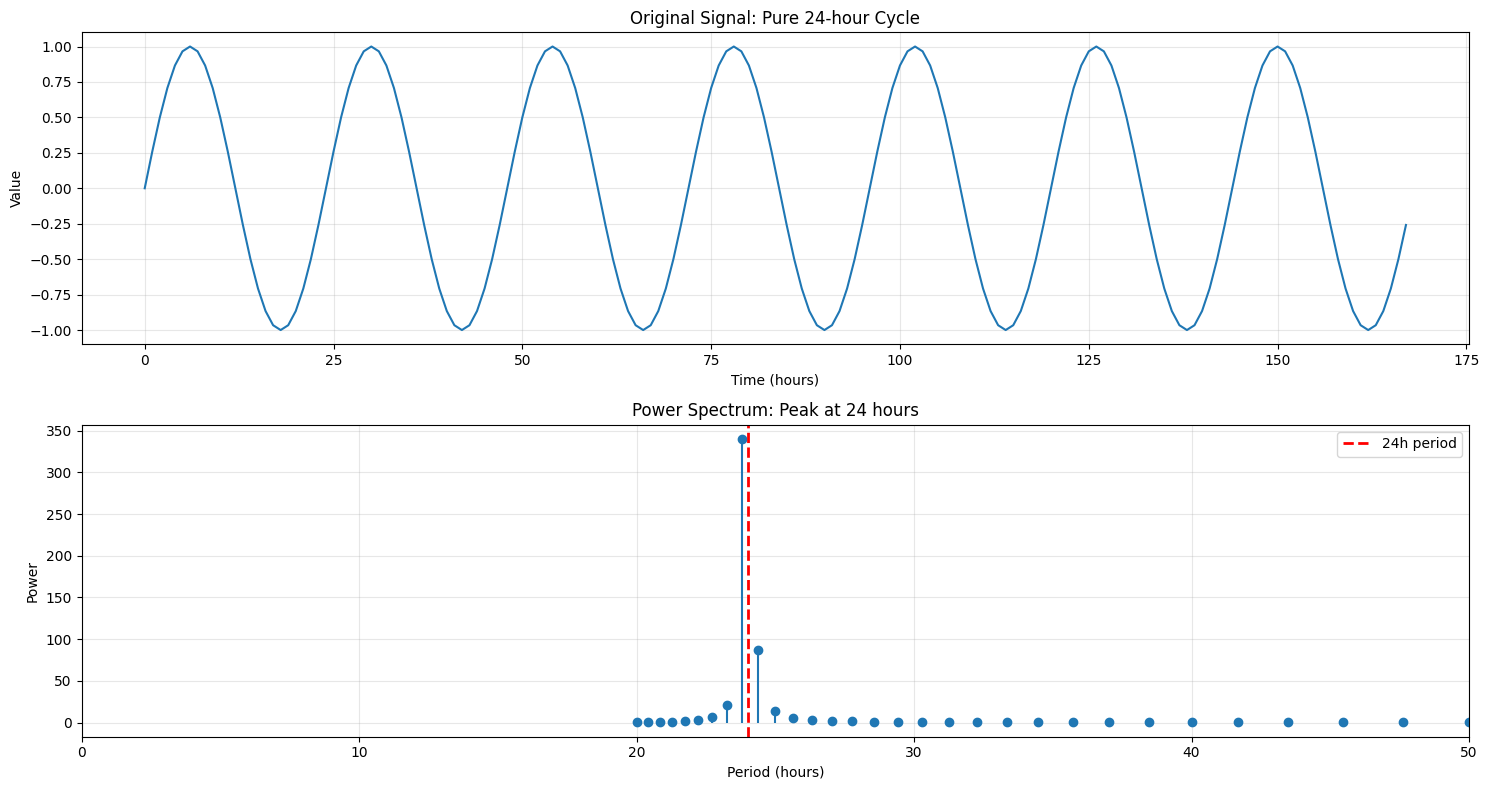

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# 例1: 単純な正弦波
t = np.arange(0, 1000)  # 1000時間
# 24時間周期の正弦波
signal_24h = np.sin(2 * np.pi * t / 24)

# パワースペクトル計算
frequencies, power = periodogram(signal_24h, fs=1.0)
periods = 1 / frequencies[1:]  # 周波数 → 周期に変換
power = power[1:]

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# 元の信号
axes[0].plot(t[:168], signal_24h[:168])  # 1週間分
axes[0].set_title('Original Signal: Pure 24-hour Cycle')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# パワースペクトル
axes[1].stem(periods[:50], power[:50], basefmt=' ')
axes[1].axvline(x=24, color='r', linestyle='--', linewidth=2, label='24h period')
axes[1].set_xlim([0, 50])
axes[1].set_title('Power Spectrum: Peak at 24 hours')
axes[1].set_xlabel('Period (hours)')
axes[1].set_ylabel('Power')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('power_spectrum_simple.png', dpi=300)

print(f"Peak period: {periods[np.argmax(power)]:.1f} hours")
print(f"Peak power: {np.max(power):.2e}")